In [10]:
import pandas as pd

df1=pd.read_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/more_clean_Ok_50000k_32874.csv')
df1=df1[['SMILES', 'Solubility1','Molecular_Weight','sol_final']]
import pandas as pd
df2=pd.read_csv('/Users/mushtaqali/Desktop/Solubility /Solubility_Paper/data/unique_train4_new24_new.csv')
df3=pd.read_csv('/Users/mushtaqali/Desktop/Solubility /Solubility_Paper/data/unique_test_new24.csv')
df4 = pd.concat([df2, df3], ignore_index=True)

In [11]:
df1.shape

(32874, 4)

In [12]:
df1=df1[['SMILES', 'Solubility1','Molecular_Weight','sol_final']]

In [13]:
import pandas as pd
df2=pd.read_csv('/Users/mushtaqali/Desktop/Solubility /Solubility_Paper/data/unique_train4_new24_new.csv')
df3=pd.read_csv('/Users/mushtaqali/Desktop/Solubility /Solubility_Paper/data/unique_test_new24.csv')
df4 = pd.concat([df2, df3], ignore_index=True)

In [14]:
df3.shape

(1282, 4)

In [15]:
df4=df4[['smiles_canon', 'Solubility']]

In [16]:
df4.shape

(19219, 2)

In [17]:
#### Function to convert smiles to canonical smiles 

from rdkit.Chem import MolFromSmiles as smi2mol
from rdkit.Chem import MolToSmiles as mol2smi
## Function to create canonical smiles 
def canon(smi):
    try:
        mol=smi2mol(smi, sanitize=True)
        smi_canon=mol2smi(mol, isomericSmiles=False, canonical=True)
        #smi_canon=mol2smi(mol, isomericSmiles=True,canonical=True) ### According to Sorkun 
        return(smi_canon)
    except:
        print("ERROR")
        return(smi)

In [20]:
#df1['smiles_canon'] = [canon(smi) for smi in df1.SMILES]
df4['smiles_canon'] = [canon(smi) for smi in df4.smiles_canon]    

[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors
[16:14:20] WARNING: not removing hydrogen atom without neighbors


In [21]:
### Finding the matching rows Reaxys and Pubchem data  based on canonical smiles(Unique representation pf the smiles )
Match_rows = pd.merge(df1, df4, on=['smiles_canon'], how='inner')
#Match_rows = pd.merge(df1, df2, on='smiles_canon', suffixes=('_pubchem', '_lit'), how='inner')

print(len(Match_rows))


368


In [22]:
Match_rows['Lit_gram_liter']=(10**Match_rows['Solubility']*Match_rows['Molecular_Weight'])

In [23]:
Match_rows['Lit_gram_liter'] = pd.to_numeric(Match_rows['Lit_gram_liter'], errors='coerce')
Match_rows['sol_final'] = pd.to_numeric(Match_rows['sol_final'], errors='coerce')

In [24]:
Match_rows['Error_gl_in_%']=abs(Match_rows['Lit_gram_liter']- Match_rows['sol_final'])/ Match_rows['Lit_gram_liter']*100

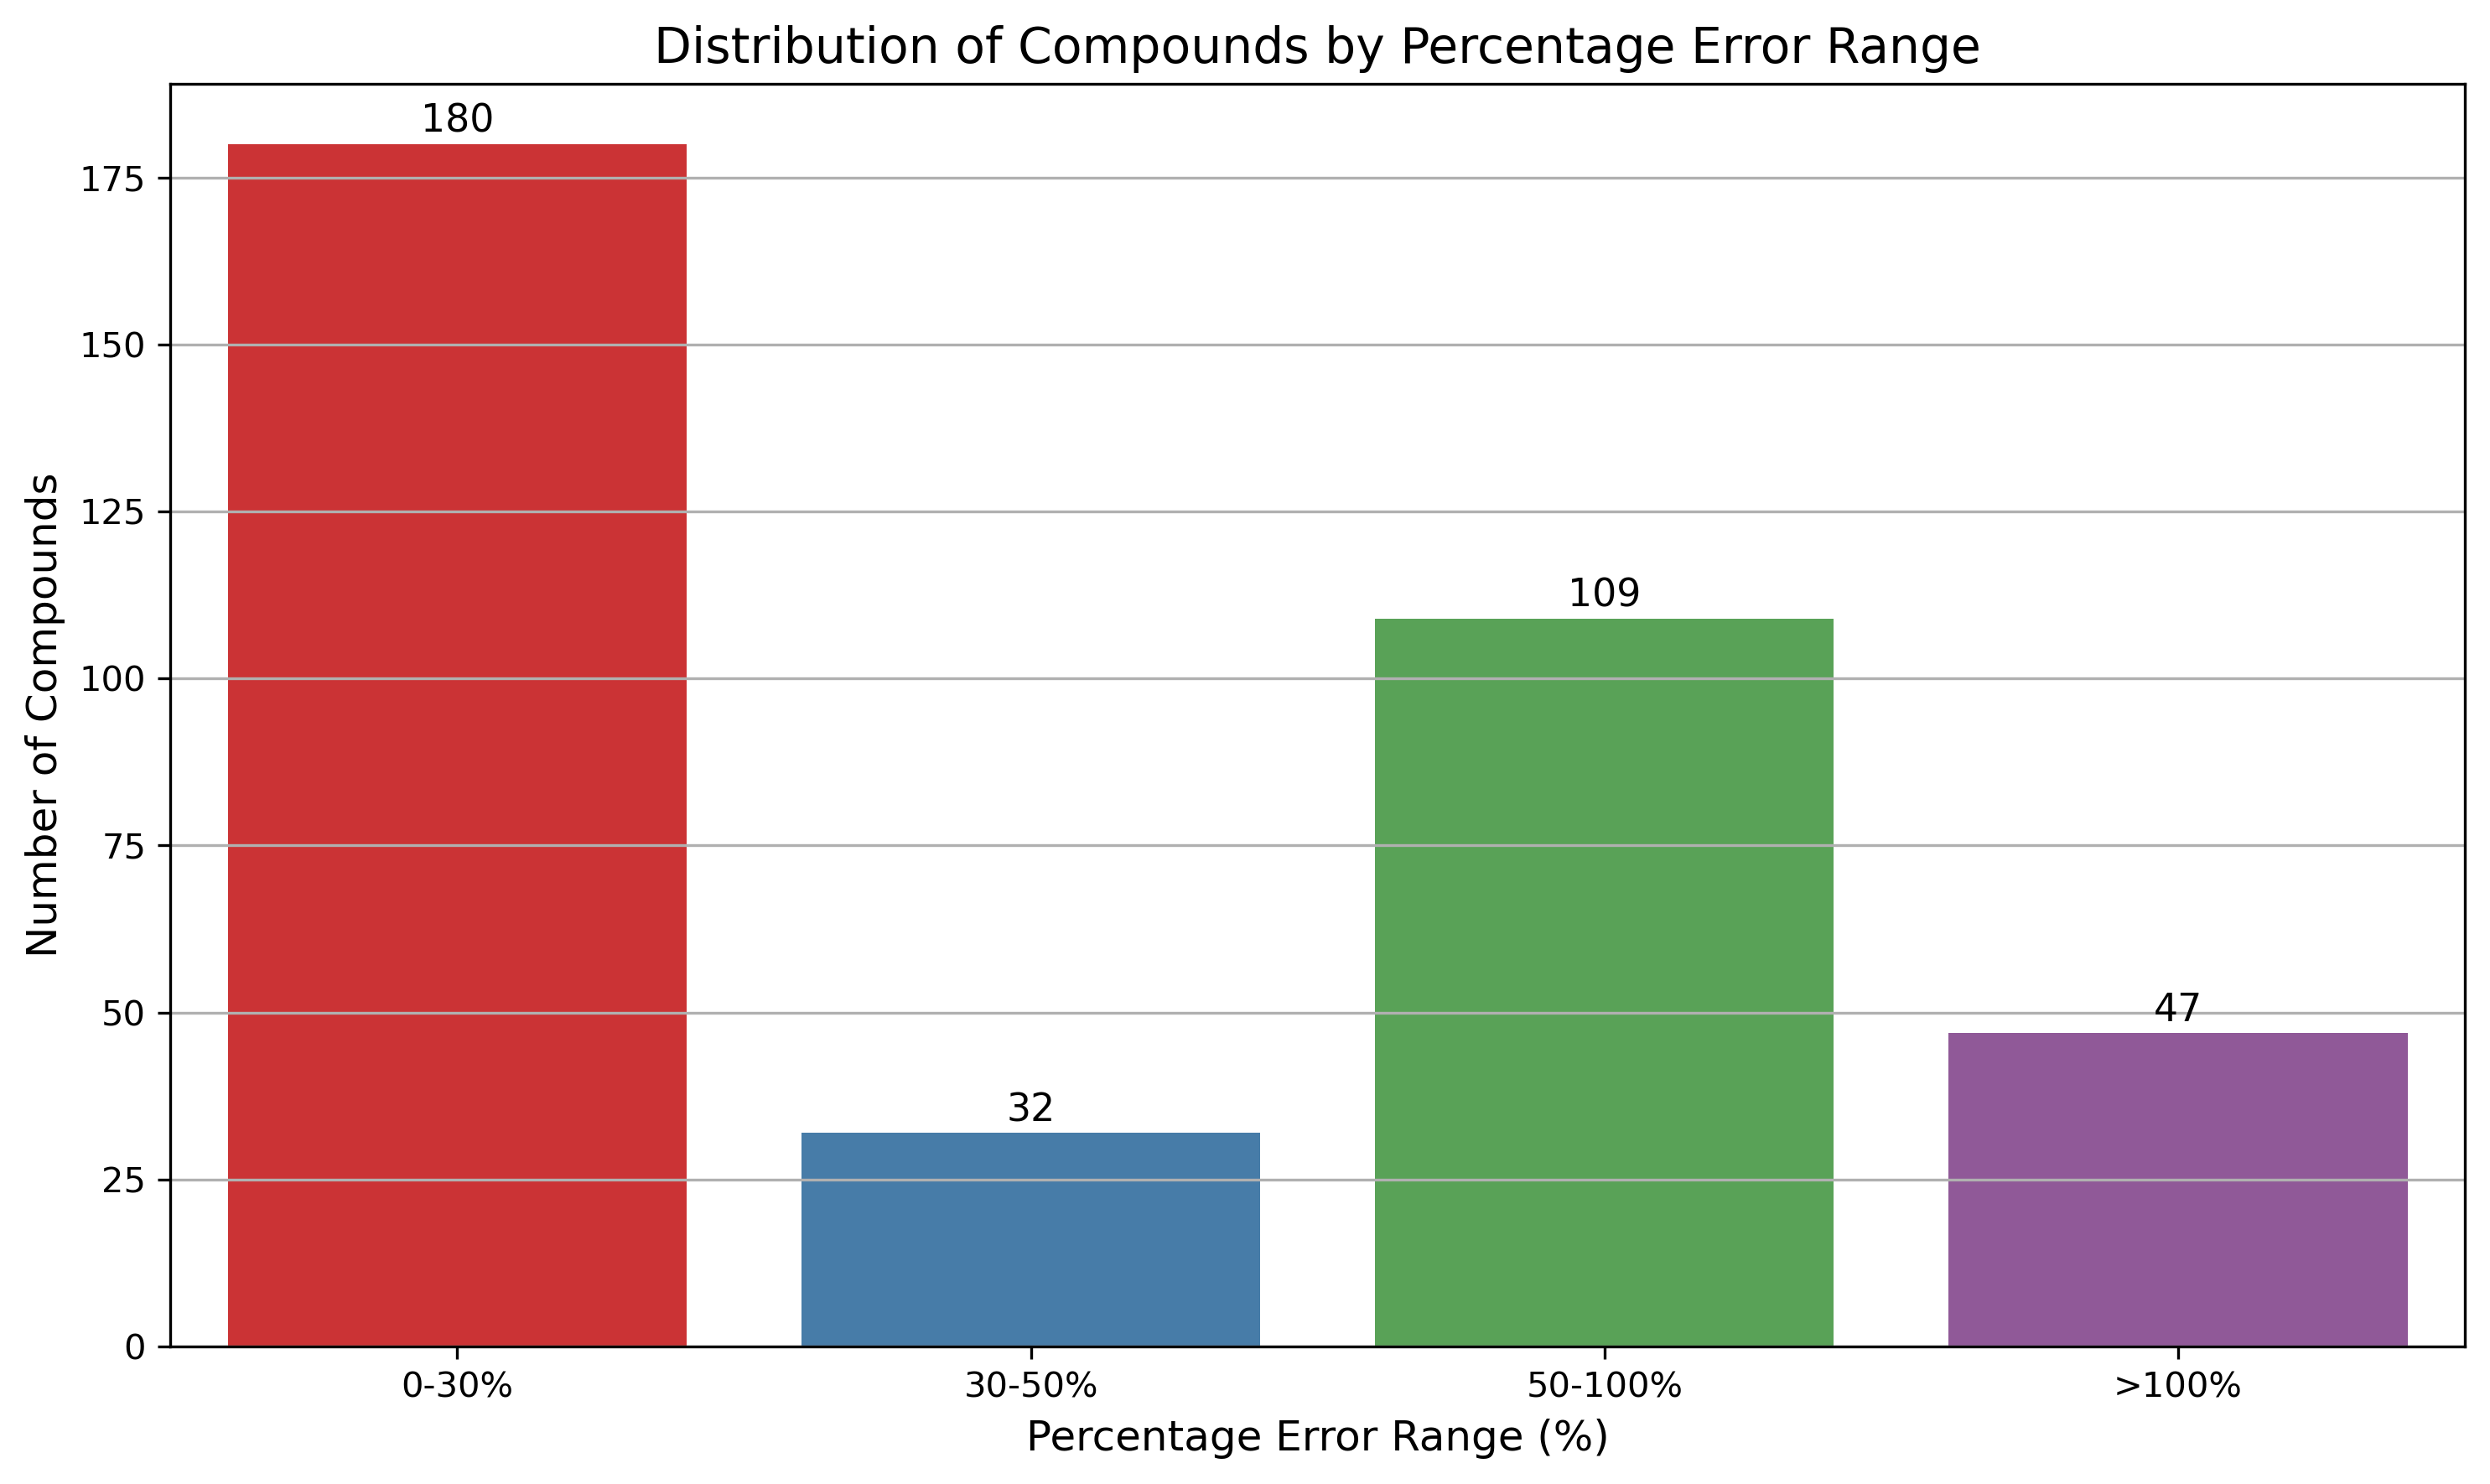

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace Match_rows with your actual DataFrame)
# Match_rows = pd.DataFrame({'Error_gl_in_%': [...]})

# Define bins and labels for the percentage error
bins = [0, 30, 50, 100, float('inf')]  # Defining the bin edges
labels = ['0-30%', '30-50%', '50-100%', '>100%']  # Labels for the bins

# Create the Error_Range column with the bins
Match_rows['Error_gl_in_Range%'] = pd.cut(Match_rows['Error_gl_in_%'], bins=bins, labels=labels, right=False)

# Count the number of compounds in each bin
error_counts = Match_rows['Error_gl_in_Range%'].value_counts().sort_index()

# Plotting the distribution of percentage error ranges
plt.figure(figsize=(10, 6), dpi=300)  # Set DPI to 300 for high resolution
sns.barplot(x=error_counts.index, y=error_counts.values, palette='Set1')

# Adding labels and title
plt.title('Distribution of Compounds by Percentage Error Range', fontsize=14)
plt.xlabel('Percentage Error Range (%)', fontsize=12)
plt.ylabel('Number of Compounds', fontsize=12)
plt.grid(axis='y')

# Adding annotations on top of each bar
for index, value in enumerate(error_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=11)

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


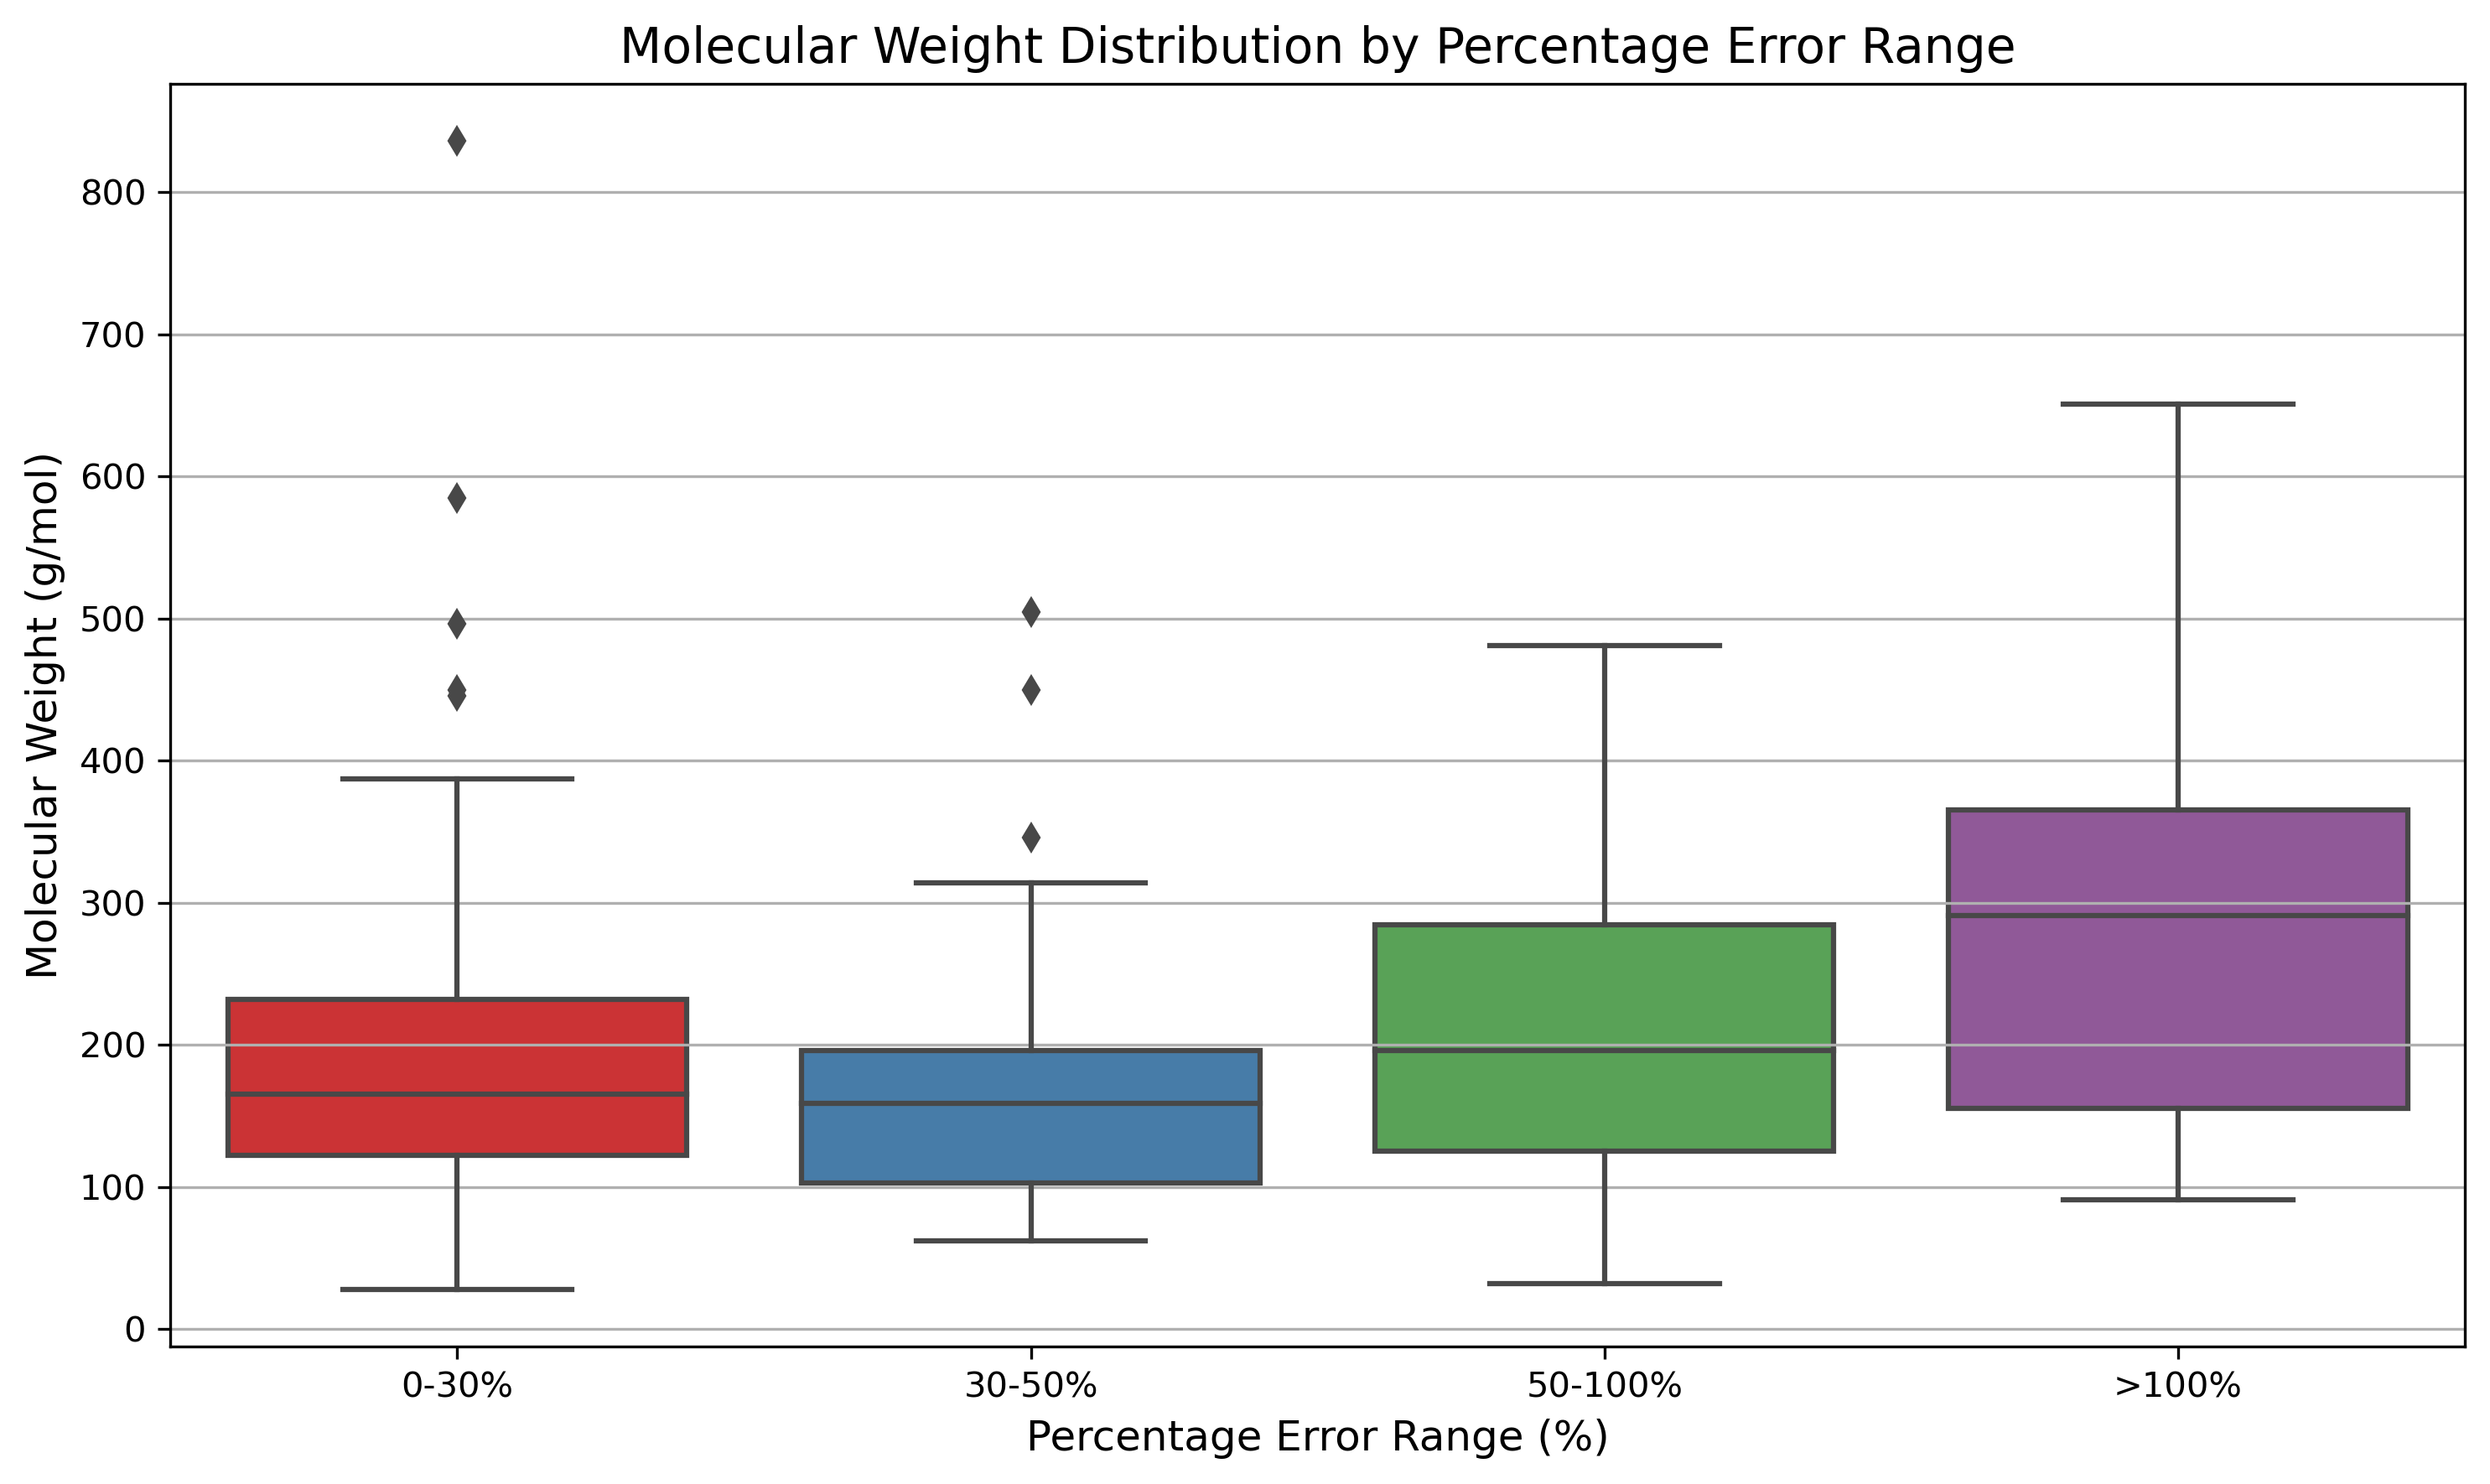

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of molecular weight grouped by error range
plt.figure(figsize=(10, 6), dpi=300)  # Set DPI to 300 for high resolution
sns.boxplot(x='Error_gl_in_Range%', y='Molecular_Weight', data=Match_rows, palette='Set1')  # Use the 'Set1' palette for consistency

# Adding labels and title
plt.title('Molecular Weight Distribution by Percentage Error Range', fontsize=14)
plt.xlabel('Percentage Error Range (%)', fontsize=12)
plt.ylabel('Molecular Weight (g/mol)', fontsize=12)
plt.grid(axis='y')

# Show plot
plt.tight_layout()  # Ensure no clipping
plt.show()



In [24]:
import pandas as pd


# Sort by 'Score' column in descending order
df_sorted = Match_rows.sort_values(by='Error_gl_in_%', ascending=True)

# View the result


In [25]:
df_sorted=df_sorted[['smiles_canon','Molecular_Weight','Lit_gram_liter','sol_final','Error_gl_in_%']]

In [26]:
df_sorted.reset_index(drop=True)

,smiles_canon,Molecular_Weight,Lit_gram_liter,sol_final,Error_gl_in_%
0,CC1COC(C)(C)O1,116.160,111.000000,111.000,9.915830e-08
1,N#CCNC(=O)c1cnccc1C(F)(F)F,229.161,5.199998,5.200,4.372680e-05
2,CSc1ccccc1,124.208,0.505999,0.506,2.182900e-04
3,O=C1OC2(c3ccccc31)c1cc(I)c(O)c(I)c1Oc1c2cc(I)c...,835.895,0.699998,0.700,2.356829e-04
4,OCCOCCOCCOCCO,194.227,1000.003332,1000.000,3.332234e-04
...,...,...,...,...,...
363,CCCCC(C)(O)CC=CC1C(O)CC(=O)C1CCCCCCC(=O)OC,382.541,0.000186,1.600,8.615047e+05
364,CCCCCCCCCCCCCCCCCC(=O)O,284.484,0.000594,5.500,9.252475e+05
365,CC(C)(C)CC(C)(C)c1ccc(OCCOCC[N+](C)(C)Cc2ccccc...,448.091,0.000591,30.000,5.073433e+06
366,CCN(CC)CCCC(C)Nc1c2ccc(Cl)cc2nc2ccc(OC)cc12.Cl.Cl,472.888,0.000003,30.000,9.118366e+08


In [175]:
df_sorted['Solubility (MCS): Solubility [g·l-1]'] = df_sorted['Solubility (MCS): Solubility [g·l-1]'].apply(lambda x: f"{x:.8f}")



In [192]:
df_sorted['Lit_gram_liter'] = df_sorted['Lit_gram_liter'].apply(lambda x: f"{x:.8f}")


In [27]:
df_sorted['Error_gl_in_%']=df_sorted['Error_gl_in_%'].apply(lambda x: f"{x:.8f}")

In [28]:
df_sorted

,smiles_canon,Molecular_Weight,Lit_gram_liter,sol_final,Error_gl_in_%
282,CC1COC(C)(C)O1,116.160,111.000000,111.000,0.00000010
358,N#CCNC(=O)c1cnccc1C(F)(F)F,229.161,5.199998,5.200,0.00004373
181,CSc1ccccc1,124.208,0.505999,0.506,0.00021829
58,O=C1OC2(c3ccccc31)c1cc(I)c(O)c(I)c1Oc1c2cc(I)c...,835.895,0.699998,0.700,0.00023568
227,OCCOCCOCCOCCO,194.227,1000.003332,1000.000,0.00033322
...,...,...,...,...,...
342,CCCCC(C)(O)CC=CC1C(O)CC(=O)C1CCCCCCC(=O)OC,382.541,0.000186,1.600,861504.71684044
101,CCCCCCCCCCCCCCCCCC(=O)O,284.484,0.000594,5.500,925247.47394388
234,CC(C)(C)CC(C)(C)c1ccc(OCCOCC[N+](C)(C)Cc2ccccc...,448.091,0.000591,30.000,5073432.86089938
130,CCN(CC)CCCC(C)Nc1c2ccc(Cl)cc2nc2ccc(OC)cc12.Cl.Cl,472.888,0.000003,30.000,911836648.97253489


In [29]:
df_sorted.to_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/Pubchem_Lit_368.csv')

In [30]:
def get_functional_groups(smiles):
    functional_groups = {
        # Polar functional groups
        'Hydroxyl Group': '[OH]',
        'Carbonyl Group': 'C=O',
        'Amide Group': 'C(=O)N',
        'Carboxyl Group': 'C(=O)[OH]',
        # Non-polar functional groups
        'Alkyl': '[R]', 
        'Aromatic Rings': 'c',
        'Alkene': 'C=C'
    }
    results = []
    for s in smiles:
        mol = Chem.MolFromSmiles(s)
        fg_presence = {fg: 1 if mol.HasSubstructMatch(Chem.MolFromSmarts(smarts)) else 0 for fg, smarts in functional_groups.items()}
        fg_presence['smiles'] = s
        results.append(fg_presence)
        data=pd.DataFrame(results)
    return data.iloc[:, :-1]

In [31]:
from rdkit import Chem

In [32]:
df_f=get_functional_groups(df_sorted.smiles_canon)

In [33]:
df_sorted.shape

(368, 5)

In [34]:
df_sorted.reset_index(drop=True)

,smiles_canon,Molecular_Weight,Lit_gram_liter,sol_final,Error_gl_in_%
0,CC1COC(C)(C)O1,116.160,111.000000,111.000,0.00000010
1,N#CCNC(=O)c1cnccc1C(F)(F)F,229.161,5.199998,5.200,0.00004373
2,CSc1ccccc1,124.208,0.505999,0.506,0.00021829
3,O=C1OC2(c3ccccc31)c1cc(I)c(O)c(I)c1Oc1c2cc(I)c...,835.895,0.699998,0.700,0.00023568
4,OCCOCCOCCOCCO,194.227,1000.003332,1000.000,0.00033322
...,...,...,...,...,...
363,CCCCC(C)(O)CC=CC1C(O)CC(=O)C1CCCCCCC(=O)OC,382.541,0.000186,1.600,861504.71684044
364,CCCCCCCCCCCCCCCCCC(=O)O,284.484,0.000594,5.500,925247.47394388
365,CC(C)(C)CC(C)(C)c1ccc(OCCOCC[N+](C)(C)Cc2ccccc...,448.091,0.000591,30.000,5073432.86089938
366,CCN(CC)CCCC(C)Nc1c2ccc(Cl)cc2nc2ccc(OC)cc12.Cl.Cl,472.888,0.000003,30.000,911836648.97253489


In [35]:
### Joining both 
df_combined = pd.concat([df_sorted, df_f], axis=1)


In [36]:
df_comb_sorted = df_combined.sort_values(by='Error_gl_in_%', ascending=True)

In [37]:
df_comb_sorted.reset_index(drop=True)

,smiles_canon,Molecular_Weight,Lit_gram_liter,sol_final,Error_gl_in_%,Hydroxyl Group,Carbonyl Group,Amide Group,Carboxyl Group,Alkyl,Aromatic Rings,Alkene
0,CC1COC(C)(C)O1,116.160,111.000000,111.0000,0.00000010,0,1,1,0,1,1,0
1,N#CCNC(=O)c1cnccc1C(F)(F)F,229.161,5.199998,5.2000,0.00004373,0,1,1,0,1,1,0
2,CSc1ccccc1,124.208,0.505999,0.5060,0.00021829,1,1,1,1,1,1,0
3,O=C1OC2(c3ccccc31)c1cc(I)c(O)c(I)c1Oc1c2cc(I)c...,835.895,0.699998,0.7000,0.00023568,0,0,0,0,0,0,0
4,OCCOCCOCCOCCO,194.227,1000.003332,1000.0000,0.00033322,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
363,CNCC(=O)O,89.094,300.950179,0.0056,99.99813923,0,1,0,0,1,1,0
364,NCCS(=O)(=O)O,125.149,85.219874,0.0012,99.99859188,0,0,0,0,0,0,0
365,CC(C)NCC(O)c1cc(O)cc(O)c1,211.261,1000.000000,0.0097,99.99903000,0,0,0,0,0,0,0
366,NC(=O)c1cccnc1,122.127,497.521312,0.0028,99.99943721,1,0,0,0,1,1,0


In [39]:
import pandas as pd
import numpy as np

# Example function to clean and convert column to numeric
def clean_numeric_column(df, column_name):
    # Remove any non-numeric characters from each value, if any
    df[column_name] = df[column_name].replace(r'[^\d.-]', '', regex=True)
    # Convert the column to numeric, setting errors='coerce' will replace non-convertible values with NaN
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    # Drop rows with NaN values in the specified column if needed
    df = df.dropna(subset=[column_name])
    return df

# Apply the function to your DataFrame
df_comb_sorted = clean_numeric_column(df_comb_sorted, 'Error_gl_in_%')

# Now you should be able to calculate statistics without encountering the error


In [40]:
import pandas as pd

# Assuming functional_groups and df_comb_sorted are defined
functional_groups = ['Hydroxyl Group', 'Carbonyl Group', 'Amide Group', 'Carboxyl Group', 'Alkyl', 'Aromatic Rings', 'Alkene']

# Calculate mean percentage error for each functional group
error_effect = {fg: df_comb_sorted[df_comb_sorted[fg] == 1]['Error_gl_in_%'].mean() for fg in functional_groups}

# Create DataFrame from the results
error_df = pd.DataFrame(list(error_effect.items()), columns=['Functional_Group', 'Mean_Percentage_Error'])

print(error_df)



  Functional_Group  Mean_Percentage_Error
0   Hydroxyl Group           6.710241e+06
1   Carbonyl Group           4.685527e+06
2      Amide Group           1.606075e+04
3   Carboxyl Group           3.452042e+02
4            Alkyl           8.040411e+06
5   Aromatic Rings           9.423078e+06
6           Alkene           1.277913e+05


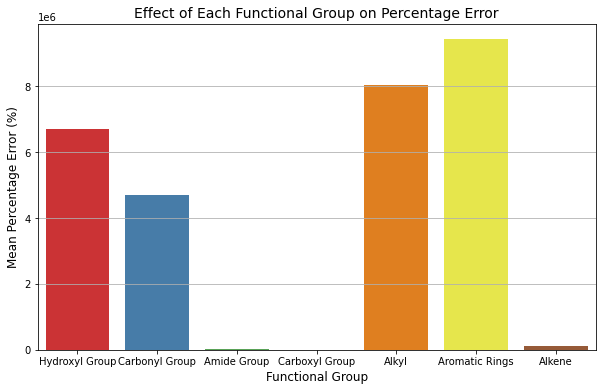

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of mean percentage error for each functional group
plt.figure(figsize=(10, 6))
sns.barplot(x='Functional_Group', y='Mean_Percentage_Error', data=error_df, palette='Set1')
plt.title('Effect of Each Functional Group on Percentage Error', fontsize=14)
plt.xlabel('Functional Group', fontsize=12)
plt.ylabel('Mean Percentage Error (%)', fontsize=12)
plt.grid(axis='y')
plt.show()


In [ ]:
#### based on the above graph we should consider the compound which has Amide group , Carboxyl group 
## and or  Alkene group else we should ignore 

In [91]:
import pandas as pd

# Sample DataFrame with binary indicators for functional groups
data = {
    'Hydroxyl Group': [1, 0, 1, 0, 1],
    'Carbonyl Group': [0, 1, 1, 0, 0],
    'Amide Group': [0, 0, 1, 1, 0],
    'Carboxyl Group': [1, 0, 0, 0, 1],
    'Alkyl': [0, 1, 0, 1, 0],
    'Aromatic Rings': [0, 0, 0, 1, 1],
    'Alkene': [1, 0, 0, 0, 1]
}

df = pd.DataFrame(data)

# Function to filter based on required groups presence and exclusion of two groups
def filter_groups_with_multiple_exclusions(df, required_groups, excluded_groups):
    # Condition 1: At least one required group is `1`
    presence_condition = (df[required_groups] == 1).any(axis=1)
    
    # Condition 2: Both excluded groups must be `0`
    exclusion_condition = (df[excluded_groups] == 0).all(axis=1)
    
    # Combine both conditions
    filtered_df = df[presence_condition & exclusion_condition]
    
    return filtered_df

# Specify groups to have at least one `1`
required_groups = ['Alkene', 'Carboxyl Group', 'Amide Group']

# Specify groups to exclude
excluded_groups = ['Aromatic Rings', 'Alkyl','Hydroxyl Group']

# Apply the function
filtered_df = filter_groups_with_multiple_exclusions(df_comb_sorted, required_groups, excluded_groups)
filtered_df.shape


(21, 12)

In [61]:
import pandas as pd

# Sample DataFrame with binary indicators for functional groups
data = {
    'Hydroxyl Group': [1, 0, 1, 0, 1],
    'Carbonyl Group': [0, 1, 1, 0, 0],
    'Amide Group': [0, 0, 1, 1, 0],
    'Carboxyl Group': [1, 0, 0, 0, 1],
    'Alkyl': [0, 1, 0, 1, 0],
    'Aromatic Rings': [0, 0, 0, 1, 1],
    'Alkene': [1, 0, 0, 0, 1]
}

df = pd.DataFrame(data)

# Function to filter rows where at least one specific group has `1` and allows others to be `0` or `1`
def filter_with_at_least_one_present(df, required_groups):
    # Define a mask where at least one of the required groups has a `1`
    mask = (df[required_groups] == 1).any(axis=1)
    
    # Apply the mask to get the filtered DataFrame
    filtered_df = df[mask]
    
    return filtered_df

# Specify the groups where we want at least one `1`
required_groups = ['Amide Group', 'Carboxyl Group', 'Alkene']

# Apply the function
filtered_df = filter_with_at_least_one_present(df_comb_sorted, required_groups)

filtered_df


,smiles_canon,Molecular_Weight,Lit_gram_liter,sol_final,Error_gl_in_%,Hydroxyl Group,Carbonyl Group,Amide Group,Carboxyl Group,Alkyl,Aromatic Rings,Alkene
282,CC1COC(C)(C)O1,116.160,111.000000,111.0000,1.000000e-07,0,1,1,0,1,1,0
358,N#CCNC(=O)c1cnccc1C(F)(F)F,229.161,5.199998,5.2000,4.373000e-05,0,1,1,0,1,1,0
181,CSc1ccccc1,124.208,0.505999,0.5060,2.182900e-04,1,1,1,1,1,1,0
267,CC(C)N.O=C(O)CNCP(=O)(O)O,228.185,1049.994664,1050.0000,5.081600e-04,1,1,1,0,1,1,0
261,CCCOC(=O)NCCCN(C)C,188.271,900.004781,900.0000,5.311900e-04,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
265,Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=O,267.245,19.702702,0.0311,9.984215e+01,0,1,1,0,1,1,0
6,CC=O,44.053,1000.005832,0.5500,9.994500e+01,1,1,0,1,0,0,0
113,O=c1cnn(C2OC(CO)C(O)C2O)c(=O)[nH]1,245.191,82.810003,0.0362,9.995629e+01,1,1,0,0,1,0,1
114,Nc1ccncc1N,109.132,38.250000,0.0122,9.996810e+01,1,1,0,1,0,0,0


In [63]:
filtered_df.reset_index(drop=True)

,smiles_canon,Molecular_Weight,Lit_gram_liter,sol_final,Error_gl_in_%,Hydroxyl Group,Carbonyl Group,Amide Group,Carboxyl Group,Alkyl,Aromatic Rings,Alkene
0,CC1COC(C)(C)O1,116.160,111.000000,111.0000,1.000000e-07,0,1,1,0,1,1,0
1,N#CCNC(=O)c1cnccc1C(F)(F)F,229.161,5.199998,5.2000,4.373000e-05,0,1,1,0,1,1,0
2,CSc1ccccc1,124.208,0.505999,0.5060,2.182900e-04,1,1,1,1,1,1,0
3,CC(C)N.O=C(O)CNCP(=O)(O)O,228.185,1049.994664,1050.0000,5.081600e-04,1,1,1,0,1,1,0
4,CCCOC(=O)NCCCN(C)C,188.271,900.004781,900.0000,5.311900e-04,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
135,Cc1cn(C2CC(N=[N+]=[N-])C(CO)O2)c(=O)[nH]c1=O,267.245,19.702702,0.0311,9.984215e+01,0,1,1,0,1,1,0
136,CC=O,44.053,1000.005832,0.5500,9.994500e+01,1,1,0,1,0,0,0
137,O=c1cnn(C2OC(CO)C(O)C2O)c(=O)[nH]1,245.191,82.810003,0.0362,9.995629e+01,1,1,0,0,1,0,1
138,Nc1ccncc1N,109.132,38.250000,0.0122,9.996810e+01,1,1,0,1,0,0,0


/var/folders/k_/8s01c4dj0gnfx2n284nvm1t80000gn/T/ipykernel_67455/649740874.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Error_gl_in_Range%'] = pd.cut(filtered_df['Error_gl_in_%'], bins=bins, labels=labels, right=False)


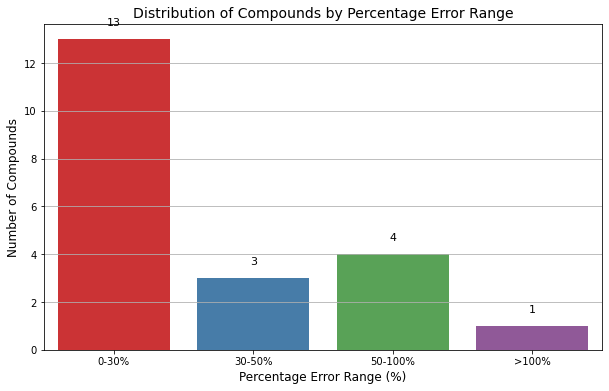

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace df_sorted2 with your actual DataFrame)
# df_sorted2 = pd.DataFrame({'Error_gl_in_%': [...]})

# Define bins and labels for the percentage error
bins = [0, 30, 50, 100, float('inf')]  # Defining the bin edges
labels = ['0-30%', '30-50%', '50-100%', '>100%']  # Labels for the bins

# Create the Error_Range column with the bins
filtered_df['Error_gl_in_Range%'] = pd.cut(filtered_df['Error_gl_in_%'], bins=bins, labels=labels, right=False)

# Count the number of compounds in each bin
error_counts = filtered_df['Error_gl_in_Range%'].value_counts().sort_index()

# Plotting the distribution of percentage error ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=error_counts.index, y=error_counts.values, palette='Set1')

# Adding labels and title
plt.title('Distribution of Compounds by Percentage Error Range', fontsize=14)
plt.xlabel('Percentage Error Range (%)', fontsize=12)
plt.ylabel('Number of Compounds', fontsize=12)
plt.grid(axis='y')
# Adding annotations on top of each bar
for index, value in enumerate(error_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=11)
# Show plot
plt.show()


In [ ]:
### Applying this to whole data 

In [75]:
import pandas as pd

df1=pd.read_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/more_clean_Ok_50000k_32874.csv')

In [76]:
df1

,Unnamed: 0,SMILES,CID,Solubility1,Molecular_Weight,sol_final
0,0,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,6.0,13.8 [ug/mL] (The mean of the results at pH 7.4),202.553,0.0138
1,1,C(CCl)Cl,11.0,"5 to 10 mg/mL at 66 °F (NTP, 1992)",98.960,7.5000
2,2,CCC(=O)C(=O)O,58.0,119 mg/mL,102.089,119.0000
3,3,CC(C)CC(=O)C(=O)O,70.0,32 mg/mL,130.143,32.0000
4,4,C(CNC(=O)N)C(=O)O,111.0,20.9 mg/mL,132.119,20.9000
...,...,...,...,...,...,...
32869,32869,CCCCC(=O)NNC(=O)C1=C(C2=CC=CC=C2NC1=O)O,54703728.0,3.5 [ug/mL] (The mean of the results at pH 7.4),303.318,0.0035
32870,32870,C[C@@]1([C@H]2C[C@H]3[C@@H](C(=O)C(=C([C@]3(C(...,54704426.0,"50 to 100 mg/mL at 72 °F (NTP, 1992)",480.901,75.0000
32871,32871,CCCN1C=CC(=C(C1=O)CC2=CC=C(C=C2)Cl)O,54710104.0,7.3 [ug/mL] (The mean of the results at pH 7.4),277.751,0.0073
32872,32872,C1CC2=C3C(=CC=C2)C(=C(C(=O)N3C1)C(=O)NCCN)O.Cl,54718545.0,48.3 [ug/mL] (The mean of the results at pH 7.4),323.780,0.0483


In [77]:
df_f=get_functional_groups(df1.SMILES)

[22:45:32] WARNING: not removing hydrogen atom without neighbors
[22:45:44] WARNING: not removing hydrogen atom without neighbors
[22:45:45] WARNING: not removing hydrogen atom without neighbors
[22:45:45] WARNING: not removing hydrogen atom without neighbors
[22:45:50] WARNING: not removing hydrogen atom without neighbors
[22:45:50] WARNING: not removing hydrogen atom without neighbors
[22:45:50] WARNING: not removing hydrogen atom without neighbors
[22:45:50] WARNING: not removing hydrogen atom without neighbors
[22:46:02] WARNING: not removing hydrogen atom without neighbors
[22:46:02] WARNING: not removing hydrogen atom without neighbors
[22:46:02] WARNING: not removing hydrogen atom without neighbors
[22:46:02] WARNING: not removing hydrogen atom without neighbors
[22:46:02] WARNING: not removing hydrogen atom without neighbors
[22:46:02] WARNING: not removing hydrogen atom without neighbors
[22:46:02] WARNING: not removing hydrogen atom without neighbors
[22:46:02] WARNING: not r

In [78]:
df_combined = pd.concat([df1, df_f], axis=1)

In [99]:
# Specify groups to have at least one `1`
required_groups = ['Alkene', 'Carboxyl Group','Amide Group']

# Specify groups to exclude
excluded_groups = ['Aromatic Rings']

# Apply the function
filtered_df = filter_groups_with_multiple_exclusions(df_combined, required_groups, excluded_groups)
filtered_df.shape

(367, 13)

In [101]:
filtered_df.reset_index(drop=True)

,Unnamed: 0,SMILES,CID,Solubility1,Molecular_Weight,sol_final,Hydroxyl Group,Carbonyl Group,Amide Group,Carboxyl Group,Alkyl,Aromatic Rings,Alkene
0,2,CCC(=O)C(=O)O,58.0,119 mg/mL,102.089,119.0000,1,1,0,1,0,0,0
1,3,CC(C)CC(=O)C(=O)O,70.0,32 mg/mL,130.143,32.0000,1,1,0,1,0,0,0
2,4,C(CNC(=O)N)C(=O)O,111.0,20.9 mg/mL,132.119,20.9000,1,1,1,1,0,0,0
3,5,C(CC(=O)O)CN,119.0,1.2 [ug/mL] (The mean of the results at pH 7.4),103.121,0.0012,1,1,0,1,0,0,0
4,8,C(CC(=O)O)C(=O)CN,137.0,18.6 [ug/mL] (The mean of the results at pH 7.4),131.131,0.0186,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,31640,C1CC(=O)N(C1)CCCNC(=O)C2C3CC(C2C(=O)O)C=C3,17381921.0,44.2 [ug/mL] (The mean of the results at pH 7.4),306.362,0.0442,1,1,1,1,1,0,1
363,31816,[H+].C=CC(=O)[O-],19966351.0,1000 mg/mL,72.063,1000.0000,0,1,0,0,0,0,1
364,32051,[H+].[H+].C(=C/C(=O)[O-])\C(=O)[O-],21883788.0,7.0 mg/mL,116.072,7.0000,0,1,0,0,0,0,1
365,32401,C[C@H](CCC(=O)NCC(=O)O)[C@H]1CCC2[C@@]1([C@H](...,22833539.0,0.0027 mg/mL,449.632,0.0027,1,1,1,1,1,0,0


In [ ]:
#### Comparing salt and without salt compound 

In [83]:
import pandas as pd

df1=pd.read_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/more_clean_Ok_50000k_32874.csv')
df1=df1[['SMILES', 'Solubility1','Molecular_Weight','sol_final']]
import pandas as pd
df2=pd.read_csv('/Users/mushtaqali/Desktop/Solubility /Solubility_Paper/data/unique_train4_new24_new.csv')
df3=pd.read_csv('/Users/mushtaqali/Desktop/Solubility /Solubility_Paper/data/unique_test_new24.csv')
df4 = pd.concat([df2, df3], ignore_index=True)

In [84]:
def has_salts(smiles):
    # Check if the SMILES is not NaN and contains a '.'
    return pd.notnull(smiles) and '.' in smiles

# Apply function to the SMILES column and create a new column for salt presence
df1['has_salts'] = df1['SMILES'].apply(has_salts)

# Filter only the rows with salts
df_with_salts1 = df1[df1['has_salts']]
df_without_salts1 = df1[~df1['has_salts'] & df1['SMILES'].notnull()]
df_with_salts1.reset_index(drop=True)
df_without_salts1.reset_index(drop=True)

,SMILES,Solubility1,Molecular_Weight,sol_final,has_salts
0,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,13.8 [ug/mL] (The mean of the results at pH 7.4),202.553,0.0138,False
1,C(CCl)Cl,"5 to 10 mg/mL at 66 °F (NTP, 1992)",98.960,7.5000,False
2,CCC(=O)C(=O)O,119 mg/mL,102.089,119.0000,False
3,CC(C)CC(=O)C(=O)O,32 mg/mL,130.143,32.0000,False
4,C(CNC(=O)N)C(=O)O,20.9 mg/mL,132.119,20.9000,False
...,...,...,...,...,...
32058,CC(=O)C1=C(C2=CC=CC=C2N(C1=O)C)O,27.3 [ug/mL] (The mean of the results at pH 7.4),217.224,0.0273,False
32059,CCN1C2=CC=CC=C2C(=C(C1=O)C(=O)NCC3=CC=CC=C3OC)O,0.7 [ug/mL] (The mean of the results at pH 7.4),352.390,0.0007,False
32060,CCCCC(=O)NNC(=O)C1=C(C2=CC=CC=C2NC1=O)O,3.5 [ug/mL] (The mean of the results at pH 7.4),303.318,0.0035,False
32061,CCCN1C=CC(=C(C1=O)CC2=CC=C(C=C2)Cl)O,7.3 [ug/mL] (The mean of the results at pH 7.4),277.751,0.0073,False


In [85]:
def has_salts(smiles):
    # Check if the SMILES is not NaN and contains a '.'
    return pd.notnull(smiles) and '.' in smiles

# Apply function to the SMILES column and create a new column for salt presence
df4['has_salts'] = df4['smiles_canon'].apply(has_salts)

# Filter only the rows with salts
df_with_salts = df4[df4['has_salts']]
df_without_salts = df4[~df4['has_salts'] & df4['smiles_canon'].notnull()]
df_with_salts.reset_index(drop=True)
df_without_salts.reset_index(drop=True)

,Unnamed: 0,smiles_canon,Solubility,occurence,has_salts
0,0,O=C1c2ccccc2C(=O)c2c(Cl)cccc21,-5.54000,1.0,False
1,1,NC(N)=NS(=O)(=O)c1ccc(N)cc1,-1.98497,1.0,False
2,2,CCC1C(N)CN1c1cc2c(cc1F)c(=O)c(C(=O)O)cn2C1CC1,-3.91200,1.0,False
3,3,CCC1(CC)OC(=O)c2cc([N+](=O)[O-])ccc21,-3.65600,1.0,False
4,4,O=C1C=Cc2ccccc2C1=NO,-2.93700,1.0,False
...,...,...,...,...,...
16191,1277,CCC(C)(O)C(C)C,-1.03500,2.0,False
16192,1278,CN(C)C(=O)Nc1cccc(OC(=O)NC(C)(C)C)c1,-2.93000,2.0,False
16193,1279,CN1C2CCC1CC(OC(=O)C(CO)c1ccccc1)C2,-2.01500,2.0,False
16194,1280,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,-6.23500,2.0,False


In [86]:
df_without_salts=df_without_salts[['smiles_canon','Solubility']]

In [87]:
df_with_salts=df_with_salts[['smiles_canon','Solubility']]

In [88]:
df_with_salts.reset_index(drop=True)

,smiles_canon,Solubility
0,Brc1ccc(OCCCCCCCCCCNCCSSCCNCCCCCCCCCCOc2ccc(Br...,-14.549050
1,CCCCCCCC[NH+](CCCCCCCC)C(=N)c1ccc(OCCCCCCC)c2c...,-13.619359
2,CCCCCCCOc1ccc(C(=N)[NH+](CCCCCCC)CCCCCCC)c2ccc...,-12.576971
3,CCCCCCCC[NH+](CCCCCCCC)C(=N)c1ccc(OCCCC)c2cccc...,-12.056329
4,Brc1cnc(OCCCCCNCCSSCCNCCCCCOc2ncc(Br)cc2Br)c(B...,-12.001110
...,...,...
3018,O=P([O-])([O-])OP(=O)([O-])[O-].[Na+].[Na+].[N...,-0.514097
3019,O=S(=O)([O-])CS(=O)(=O)[O-].[Ca+2],0.125504
3020,[Cl-].[NH3+]C1CCC1S,0.478236
3021,[Cl-].[NH3+]CC1CCC1S,-0.028221


In [89]:
df_without_salts.reset_index(drop=True)

,smiles_canon,Solubility
0,O=C1c2ccccc2C(=O)c2c(Cl)cccc21,-5.54000
1,NC(N)=NS(=O)(=O)c1ccc(N)cc1,-1.98497
2,CCC1C(N)CN1c1cc2c(cc1F)c(=O)c(C(=O)O)cn2C1CC1,-3.91200
3,CCC1(CC)OC(=O)c2cc([N+](=O)[O-])ccc21,-3.65600
4,O=C1C=Cc2ccccc2C1=NO,-2.93700
...,...,...
16191,CCC(C)(O)C(C)C,-1.03500
16192,CN(C)C(=O)Nc1cccc(OC(=O)NC(C)(C)C)c1,-2.93000
16193,CN1C2CCC1CC(OC(=O)C(CO)c1ccccc1)C2,-2.01500
16194,ClC1=C(Cl)C2(Cl)C3C4CC(C5OC45)C3C1(Cl)C2(Cl)Cl,-6.23500


In [91]:
import pandas as pd
import numpy as np


# Function to convert g/L to logS
def calculate_logS(row):
    try:
        # Calculate molar concentration in moles/L and then take the log
        molar_concentration = row['sol_final'] / row['Molecular_Weight']
        return np.log10(molar_concentration) if molar_concentration > 0 else np.nan
    except (TypeError, ZeroDivisionError):
        return np.nan

# Apply the function to each row to create a new column for logS
df_with_salts1['LogS']=df_with_salts1.apply(calculate_logS, axis=1)


/var/folders/k_/8s01c4dj0gnfx2n284nvm1t80000gn/T/ipykernel_68057/3713828273.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_salts1['LogS']=df_with_salts1.apply(calculate_logS, axis=1)


In [92]:
### Convert gram / liter in to logS 
df_without_salts1['LogS']=df_without_salts1.apply(calculate_logS, axis=1)

/var/folders/k_/8s01c4dj0gnfx2n284nvm1t80000gn/T/ipykernel_68057/2645251391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_salts1['LogS']=df_without_salts1.apply(calculate_logS, axis=1)


In [48]:
df_without_salts.to_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/Pubchem_without_salts_32063.csv',index=False)

In [49]:
df_with_salts.to_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/Pubchem_with_salts_811.csv',index=False)

In [56]:
df_with_salts.to_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/Literature_with_salts_3022.csv',index=False)

In [95]:
df1=pd.read_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/Pubchem_with_salts_811.csv')
df2=pd.read_csv('/Users/mushtaqali/Desktop/Pubchem/Pubchem_new/Literature_with_salts_3022.csv')

In [96]:
df2

,smiles_canon,Solubility
0,Brc1ccc(OCCCCCCCCCCNCCSSCCNCCCCCCCCCCOc2ccc(Br...,-14.549050
1,CCCCCCCC[NH+](CCCCCCCC)C(=N)c1ccc(OCCCCCCC)c2c...,-13.619359
2,CCCCCCCOc1ccc(C(=N)[NH+](CCCCCCC)CCCCCCC)c2ccc...,-12.576971
3,CCCCCCCC[NH+](CCCCCCCC)C(=N)c1ccc(OCCCC)c2cccc...,-12.056329
4,Brc1cnc(OCCCCCNCCSSCCNCCCCCOc2ncc(Br)cc2Br)c(B...,-12.001110
...,...,...
3017,O=C([O-])c1ccccc1O.[Na+],-0.107496
3018,O=P([O-])([O-])OP(=O)([O-])[O-].[Na+].[Na+].[N...,-0.514097
3019,O=S(=O)([O-])CS(=O)(=O)[O-].[Ca+2],0.125504
3020,[Cl-].[NH3+]C1CCC1S,0.478236


In [97]:
#### Function to convert smiles to canonical smiles 

from rdkit.Chem import MolFromSmiles as smi2mol
from rdkit.Chem import MolToSmiles as mol2smi
## Function to create canonical smiles 
def canon(smi):
    try:
        mol=smi2mol(smi, sanitize=True)
        smi_canon=mol2smi(mol, isomericSmiles=False, canonical=True)
        #smi_canon=mol2smi(mol, isomericSmiles=True,canonical=True) ### According to Sorkun 
        return(smi_canon)
    except:
        print("ERROR")
        return(smi)
df_with_salts1['smiles_canon'] = [canon(smi) for smi in df_with_salts1.SMILES]
df_without_salts1['smiles_canon'] = [canon(smi) for smi in df_without_salts1.SMILES]

[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not removing hydrogen atom without neighbors
[17:01:59] WARNING: not r

In [98]:
#### Function to convert smiles to canonical smiles 

from rdkit.Chem import MolFromSmiles as smi2mol
from rdkit.Chem import MolToSmiles as mol2smi
## Function to create canonical smiles 
def canon(smi):
    try:
        mol=smi2mol(smi, sanitize=True)
        smi_canon=mol2smi(mol, isomericSmiles=False, canonical=True)
        #smi_canon=mol2smi(mol, isomericSmiles=True,canonical=True) ### According to Sorkun 
        return(smi_canon)
    except:
        print("ERROR")
        return(smi)
df_with_salts['smiles_canon'] = [canon(smi) for smi in df_with_salts.smiles_canon]
df_without_salts['smiles_canon'] = [canon(smi) for smi in df_without_salts.smiles_canon]

[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors
[17:02:11] WARNING: not removing hydrogen atom without neighbors


In [99]:
### Finding the matching rows Reaxys and Pubchem data  based on canonical smiles(Unique representation pf the smiles )
Match_rows1 = pd.merge(df_with_salts1, df4, on=['smiles_canon'], how='inner')
#Match_rows = pd.merge(df1, df2, on='smiles_canon', suffixes=('_pubchem', '_lit'), how='inner')

print(len(Match_rows1))
Match_rows2 = pd.merge(df_without_salts1, df4, on=['smiles_canon'], how='inner')
#Match_rows = pd.merge(df1, df2, on='smiles_canon', suffixes=('_pubchem', '_lit'), how='inner')

print(len(Match_rows2))

22
346


In [112]:
Match_rows1['Lit_gram_liter']=(10**Match_rows1['Solubility']*Match_rows1['Molecular_Weight'])
Match_rows2['Lit_gram_liter']=(10**Match_rows2['Solubility']*Match_rows2['Molecular_Weight'])
Match_rows1['Lit_gram_liter'] = pd.to_numeric(Match_rows1['Lit_gram_liter'], errors='coerce')
Match_rows1['sol_final_new'] = pd.to_numeric(Match_rows1['sol_final'], errors='coerce')
#Match_rows2['sol_final_new'] = pd.to_numeric(Match_rows2['sol_final'], errors='coerce')
Match_rows1['Error_gl_in_%']=abs(Match_rows1['Lit_gram_liter']- Match_rows1['sol_final'])/ Match_rows2['Lit_gram_liter']*100
Match_rows2['Lit_gram_liter'] = pd.to_numeric(Match_rows2['Lit_gram_liter'], errors='coerce')
Match_rows2['sol_final_new'] = pd.to_numeric(Match_rows2['sol_final'], errors='coerce')
Match_rows2['Error_gl_in_%']=abs(Match_rows2['Lit_gram_liter']- Match_rows2['sol_final_new'])/ Match_rows2['Lit_gram_liter']*100

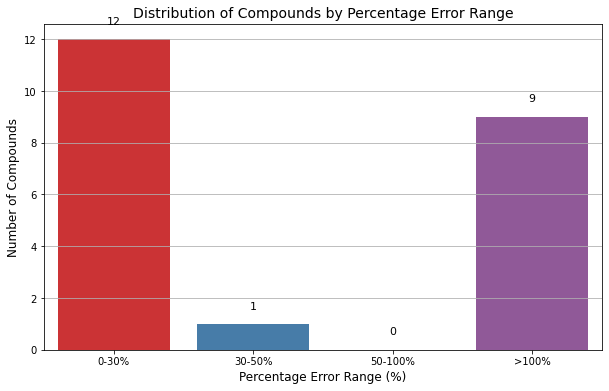

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace df_sorted2 with your actual DataFrame)
# df_sorted2 = pd.DataFrame({'Error_gl_in_%': [...]})

# Define bins and labels for the percentage error
bins = [0, 30, 50, 100, float('inf')]  # Defining the bin edges
labels = ['0-30%', '30-50%', '50-100%', '>100%']  # Labels for the bins

# Create the Error_Range column with the bins
Match_rows1['Error_gl_in_Range%'] = pd.cut(Match_rows1['Error_gl_in_%'], bins=bins, labels=labels, right=False)

# Count the number of compounds in each bin
error_counts = Match_rows1['Error_gl_in_Range%'].value_counts().sort_index()

# Plotting the distribution of percentage error ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=error_counts.index, y=error_counts.values, palette='Set1')

# Adding labels and title
plt.title('Distribution of Compounds by Percentage Error Range', fontsize=14)
plt.xlabel('Percentage Error Range (%)', fontsize=12)
plt.ylabel('Number of Compounds', fontsize=12)
plt.grid(axis='y')
# Adding annotations on top of each bar
for index, value in enumerate(error_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=11)
# Show plot
plt.show()


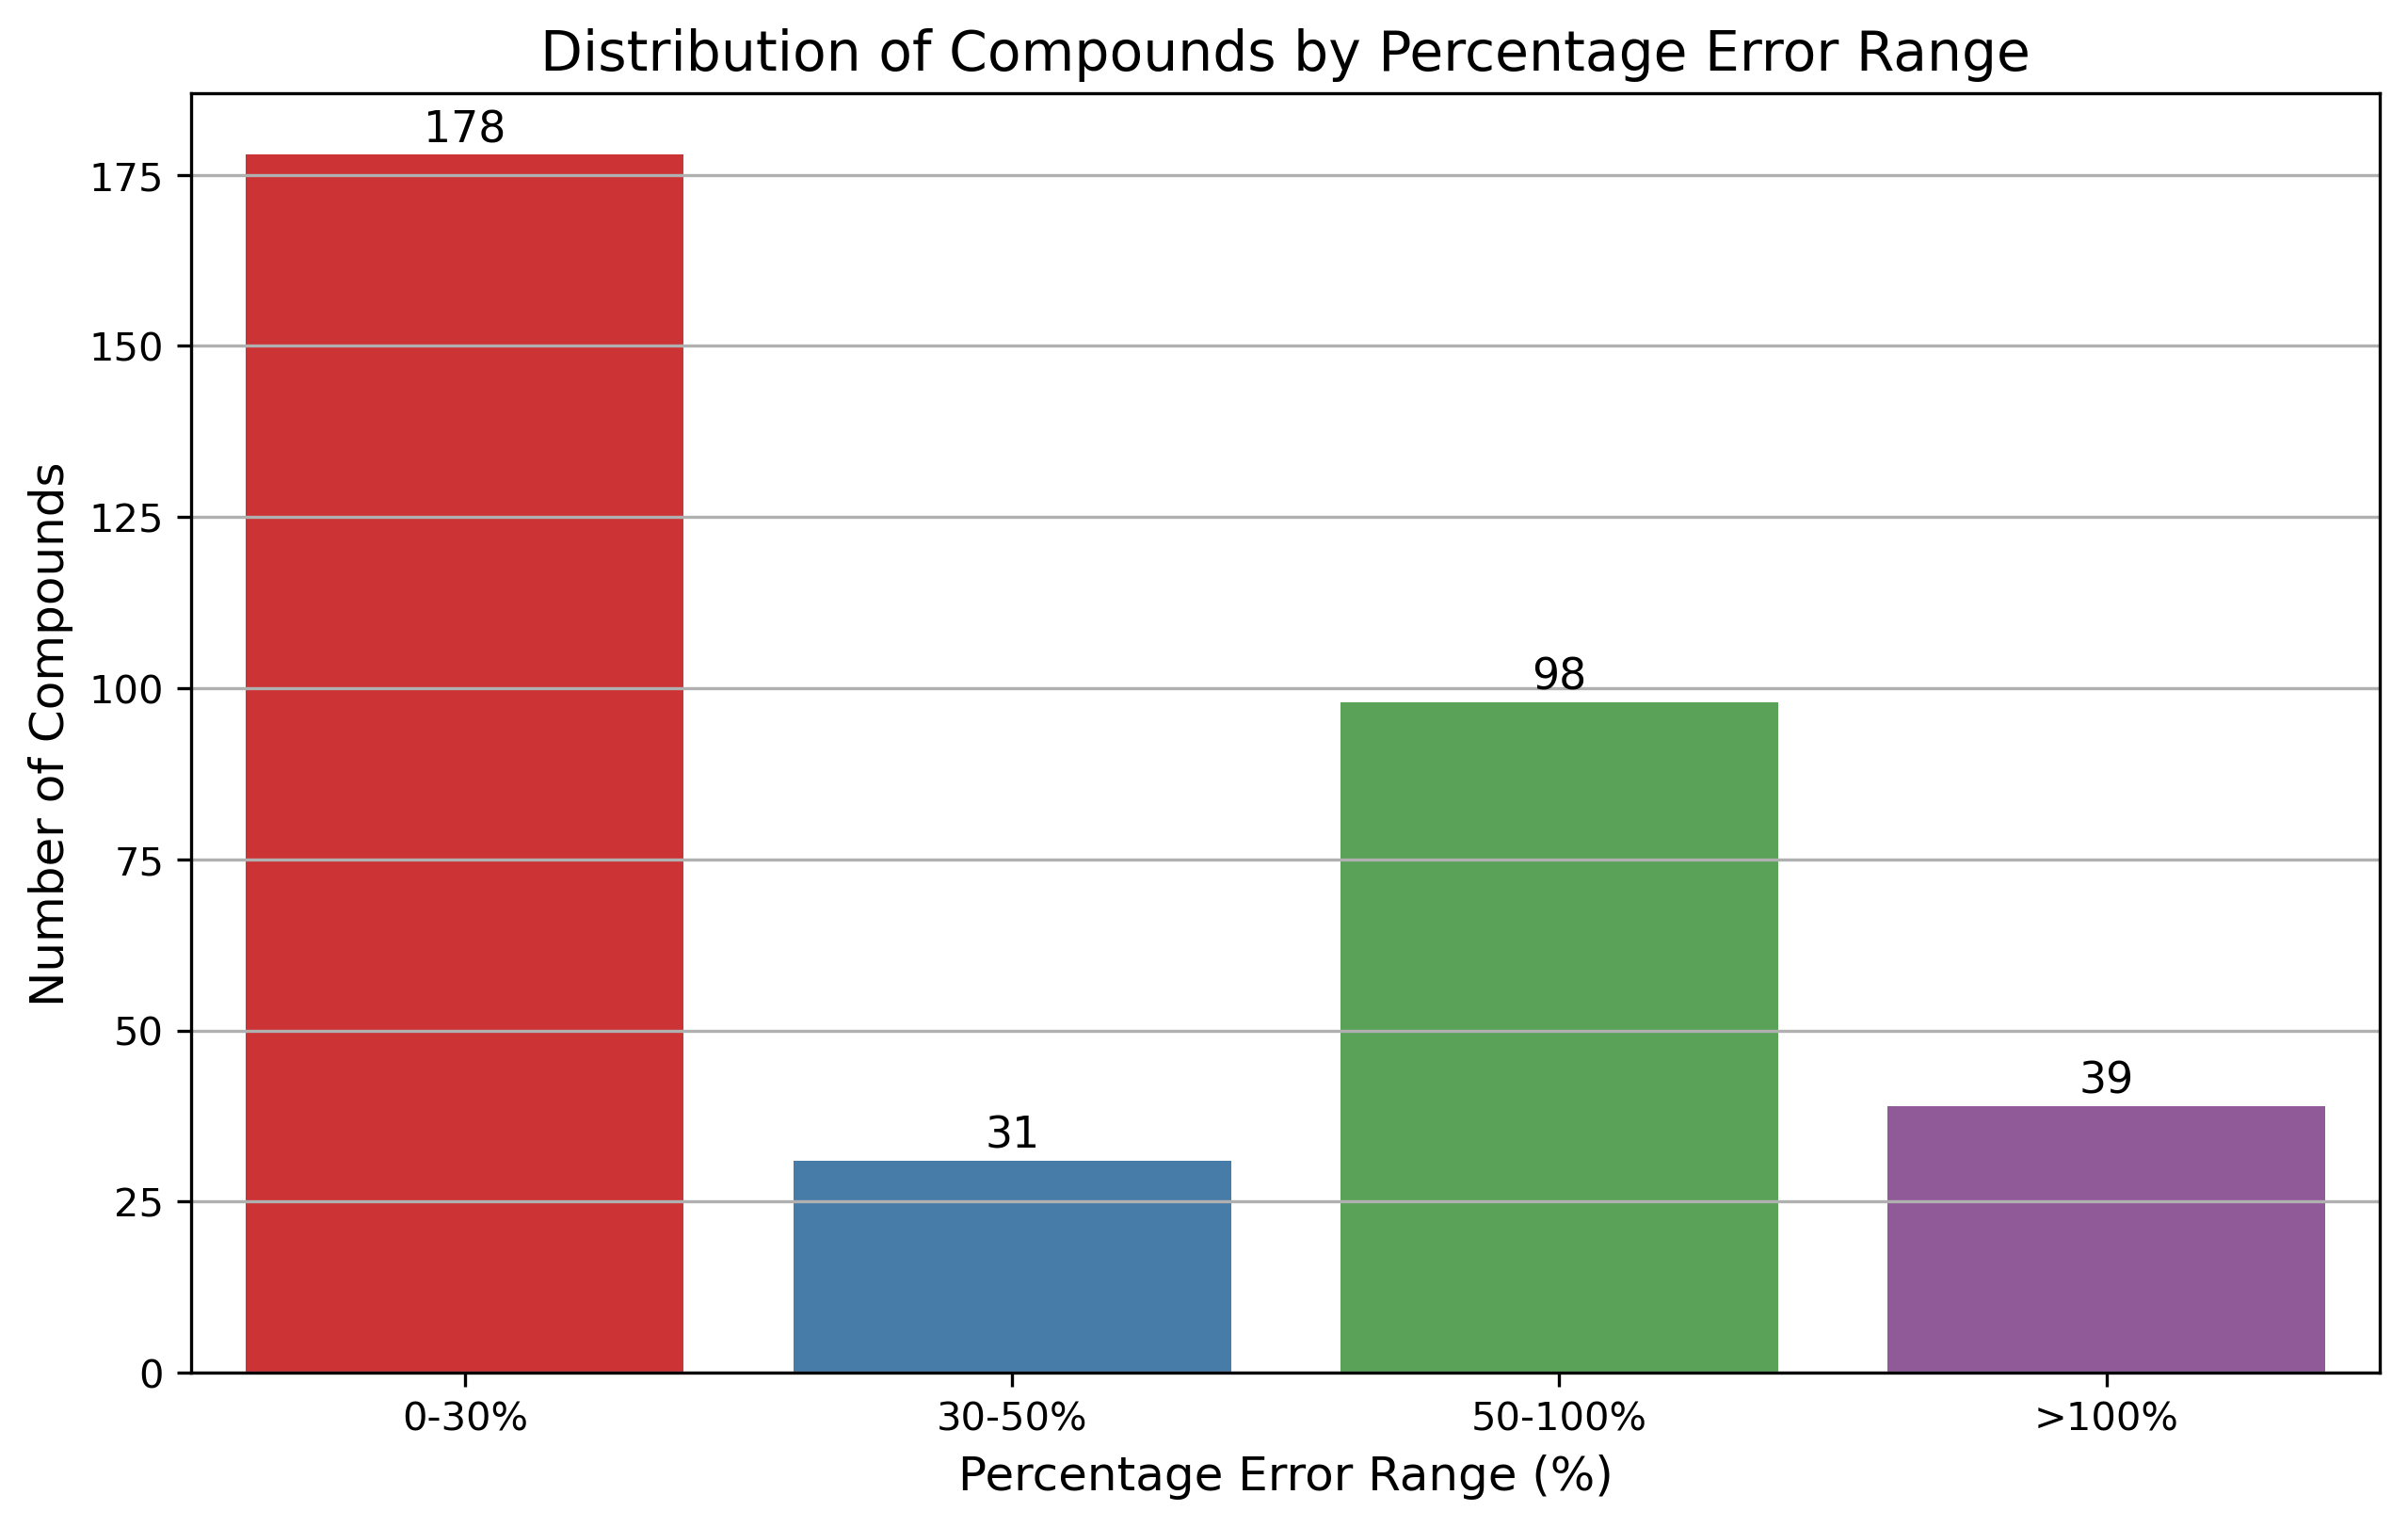

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace df_sorted2 with your actual DataFrame)
# df_sorted2 = pd.DataFrame({'Error_gl_in_%': [...]})

# Define bins and labels for the percentage error
bins = [0, 30, 50, 100, float('inf')]  # Defining the bin edges
labels = ['0-30%', '30-50%', '50-100%', '>100%']  # Labels for the bins

# Create the Error_Range column with the bins
Match_rows2['Error_gl_in_Range%'] = pd.cut(Match_rows2['Error_gl_in_%'], bins=bins, labels=labels, right=False)

# Count the number of compounds in each bin
error_counts = Match_rows2['Error_gl_in_Range%'].value_counts().sort_index()

# Plotting the distribution of percentage error ranges
plt.figure(figsize=(10, 6), dpi=300)  # Increased dpi to 300
sns.barplot(x=error_counts.index, y=error_counts.values, palette='Set1')

# Adding labels and title
plt.title('Distribution of Compounds by Percentage Error Range', fontsize=14)
plt.xlabel('Percentage Error Range (%)', fontsize=12)
plt.ylabel('Number of Compounds', fontsize=12)
plt.grid(axis='y')

# Adding annotations on top of each bar
for index, value in enumerate(error_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=11)

# Show plot
plt.show()


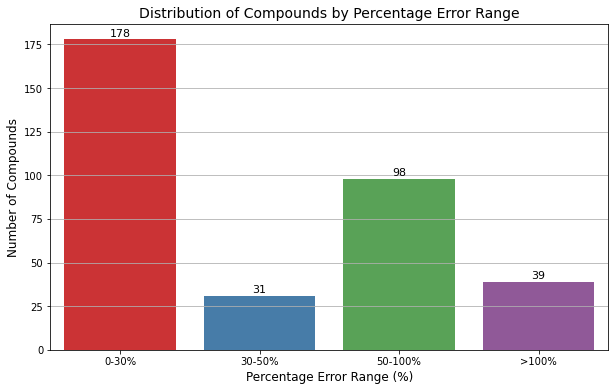

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace df_sorted2 with your actual DataFrame)
# df_sorted2 = pd.DataFrame({'Error_gl_in_%': [...]})

# Define bins and labels for the percentage error
bins = [0, 30, 50, 100, float('inf')]  # Defining the bin edges
labels = ['0-30%', '30-50%', '50-100%', '>100%']  # Labels for the bins

# Create the Error_Range column with the bins
Match_rows2['Error_gl_in_Range%'] = pd.cut(Match_rows2['Error_gl_in_%'], bins=bins, labels=labels, right=False)

# Count the number of compounds in each bin
error_counts = Match_rows2['Error_gl_in_Range%'].value_counts().sort_index()

# Plotting the distribution of percentage error ranges
plt.figure(figsize=(10, 6))
sns.barplot(x=error_counts.index, y=error_counts.values, palette='Set1')

# Adding labels and title
plt.title('Distribution of Compounds by Percentage Error Range', fontsize=14)
plt.xlabel('Percentage Error Range (%)', fontsize=12)
plt.ylabel('Number of Compounds', fontsize=12)
plt.grid(axis='y')
# Adding annotations on top of each bar
for index, value in enumerate(error_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=11)
# Show plot
plt.show()
